In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/ajeetsingh55555/pythonfiles/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")

##data downloaded from csv file which downloaded and saved from github

Predicting HR Attrition (Yes / No) , The output is Binary here so will first review the data , columns and perform EDA

checking the column names

In [13]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


checking the null values using heatmap, so to check this in values we will use below command

<AxesSubplot:>

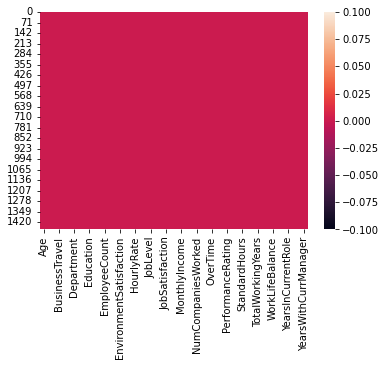

In [15]:
sns.heatmap(df.isnull())
#Below shows the data does not have NULL Values

# checking the count of null values

In [16]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# we will require encoding to convert oject into float

In [17]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [18]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here we will replace NULL values with Mean or Mode
some of the column have float values i.e. latitude,logitude,commissioning_year,year_of_capacity_data however we will go with replacing with NULL with Mode due to the charactristic of these columns and for rest we will use Mean

Now checking the null value status

<AxesSubplot:>

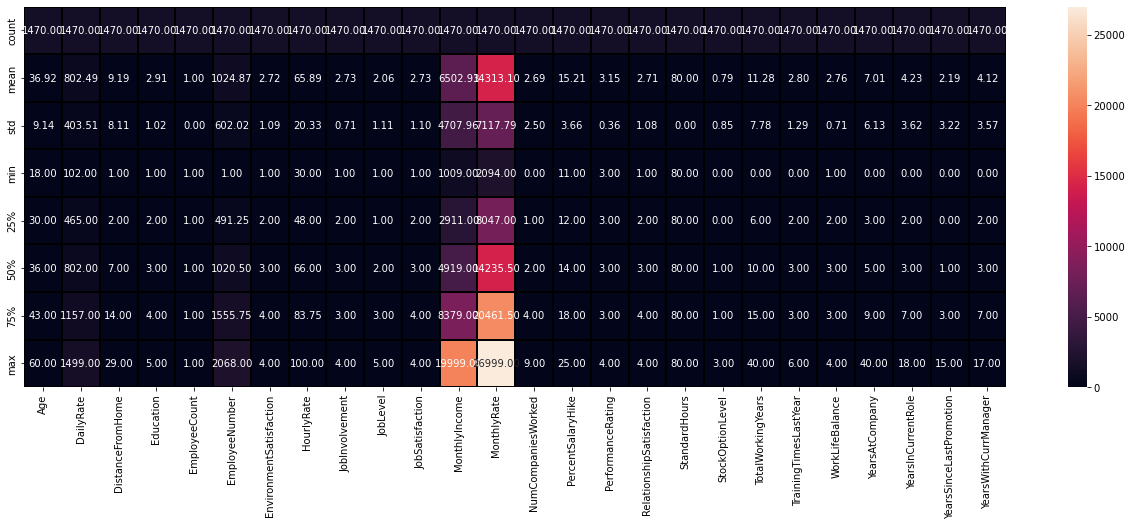

In [19]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [20]:
df.shape
#data has 21 columns and 907 rows

(1470, 35)

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [22]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

Above we have replaced null values and then converted all object to float or int, now we will check correlation and individual column data distribution

In [24]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

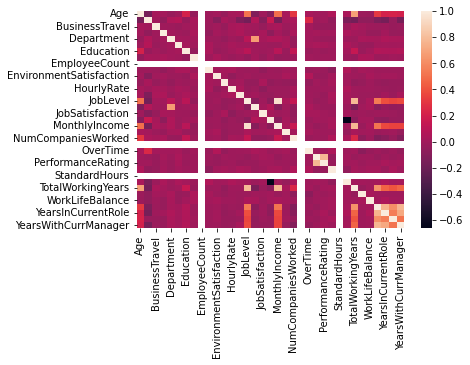

In [25]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [26]:
dfcorr["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

From the above column EmployeeCount,Over18,StandardHours have same values for all so need to be dropped
The columns with very low correlation , we will drop which are below

DistanceFromHome
JobRole
Department
Gender
EducationField
MonthlyRate
PerformanceRating
BusinessTravel
HourlyRate
EmployeeNumber
PercentSalaryHike
Education
YearsSinceLastPromotion
RelationshipSatisfaction
DailyRate
TrainingTimesLastYear
WorkLifeBalance




In [27]:
df1=df.drop(["EmployeeCount","Over18","StandardHours","DistanceFromHome","JobRole","Department","Gender","EducationField","MonthlyRate","PerformanceRating","BusinessTravel","HourlyRate","EmployeeNumber","PercentSalaryHike","Education","YearsSinceLastPromotion","RelationshipSatisfaction","DailyRate","TrainingTimesLastYear","WorkLifeBalance"],axis=1)
df1

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1.0,2,3,2,4,2.0,5993,8,1.0,0,8,6,4,5
1,49,0.0,3,2,2,2,1.0,5130,1,0.0,1,10,10,7,7
2,37,1.0,4,2,1,3,2.0,2090,6,1.0,0,7,0,0,0
3,33,0.0,4,3,1,3,1.0,2909,1,1.0,0,8,8,7,0
4,27,0.0,1,3,1,2,1.0,3468,9,0.0,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,3,4,2,4,1.0,2571,4,0.0,1,17,5,2,3
1466,39,0.0,4,2,3,1,1.0,9991,4,0.0,1,9,7,7,7
1467,27,0.0,2,4,2,2,1.0,6142,1,1.0,1,6,6,2,3
1468,49,0.0,4,2,2,2,1.0,5390,2,0.0,0,17,9,6,8


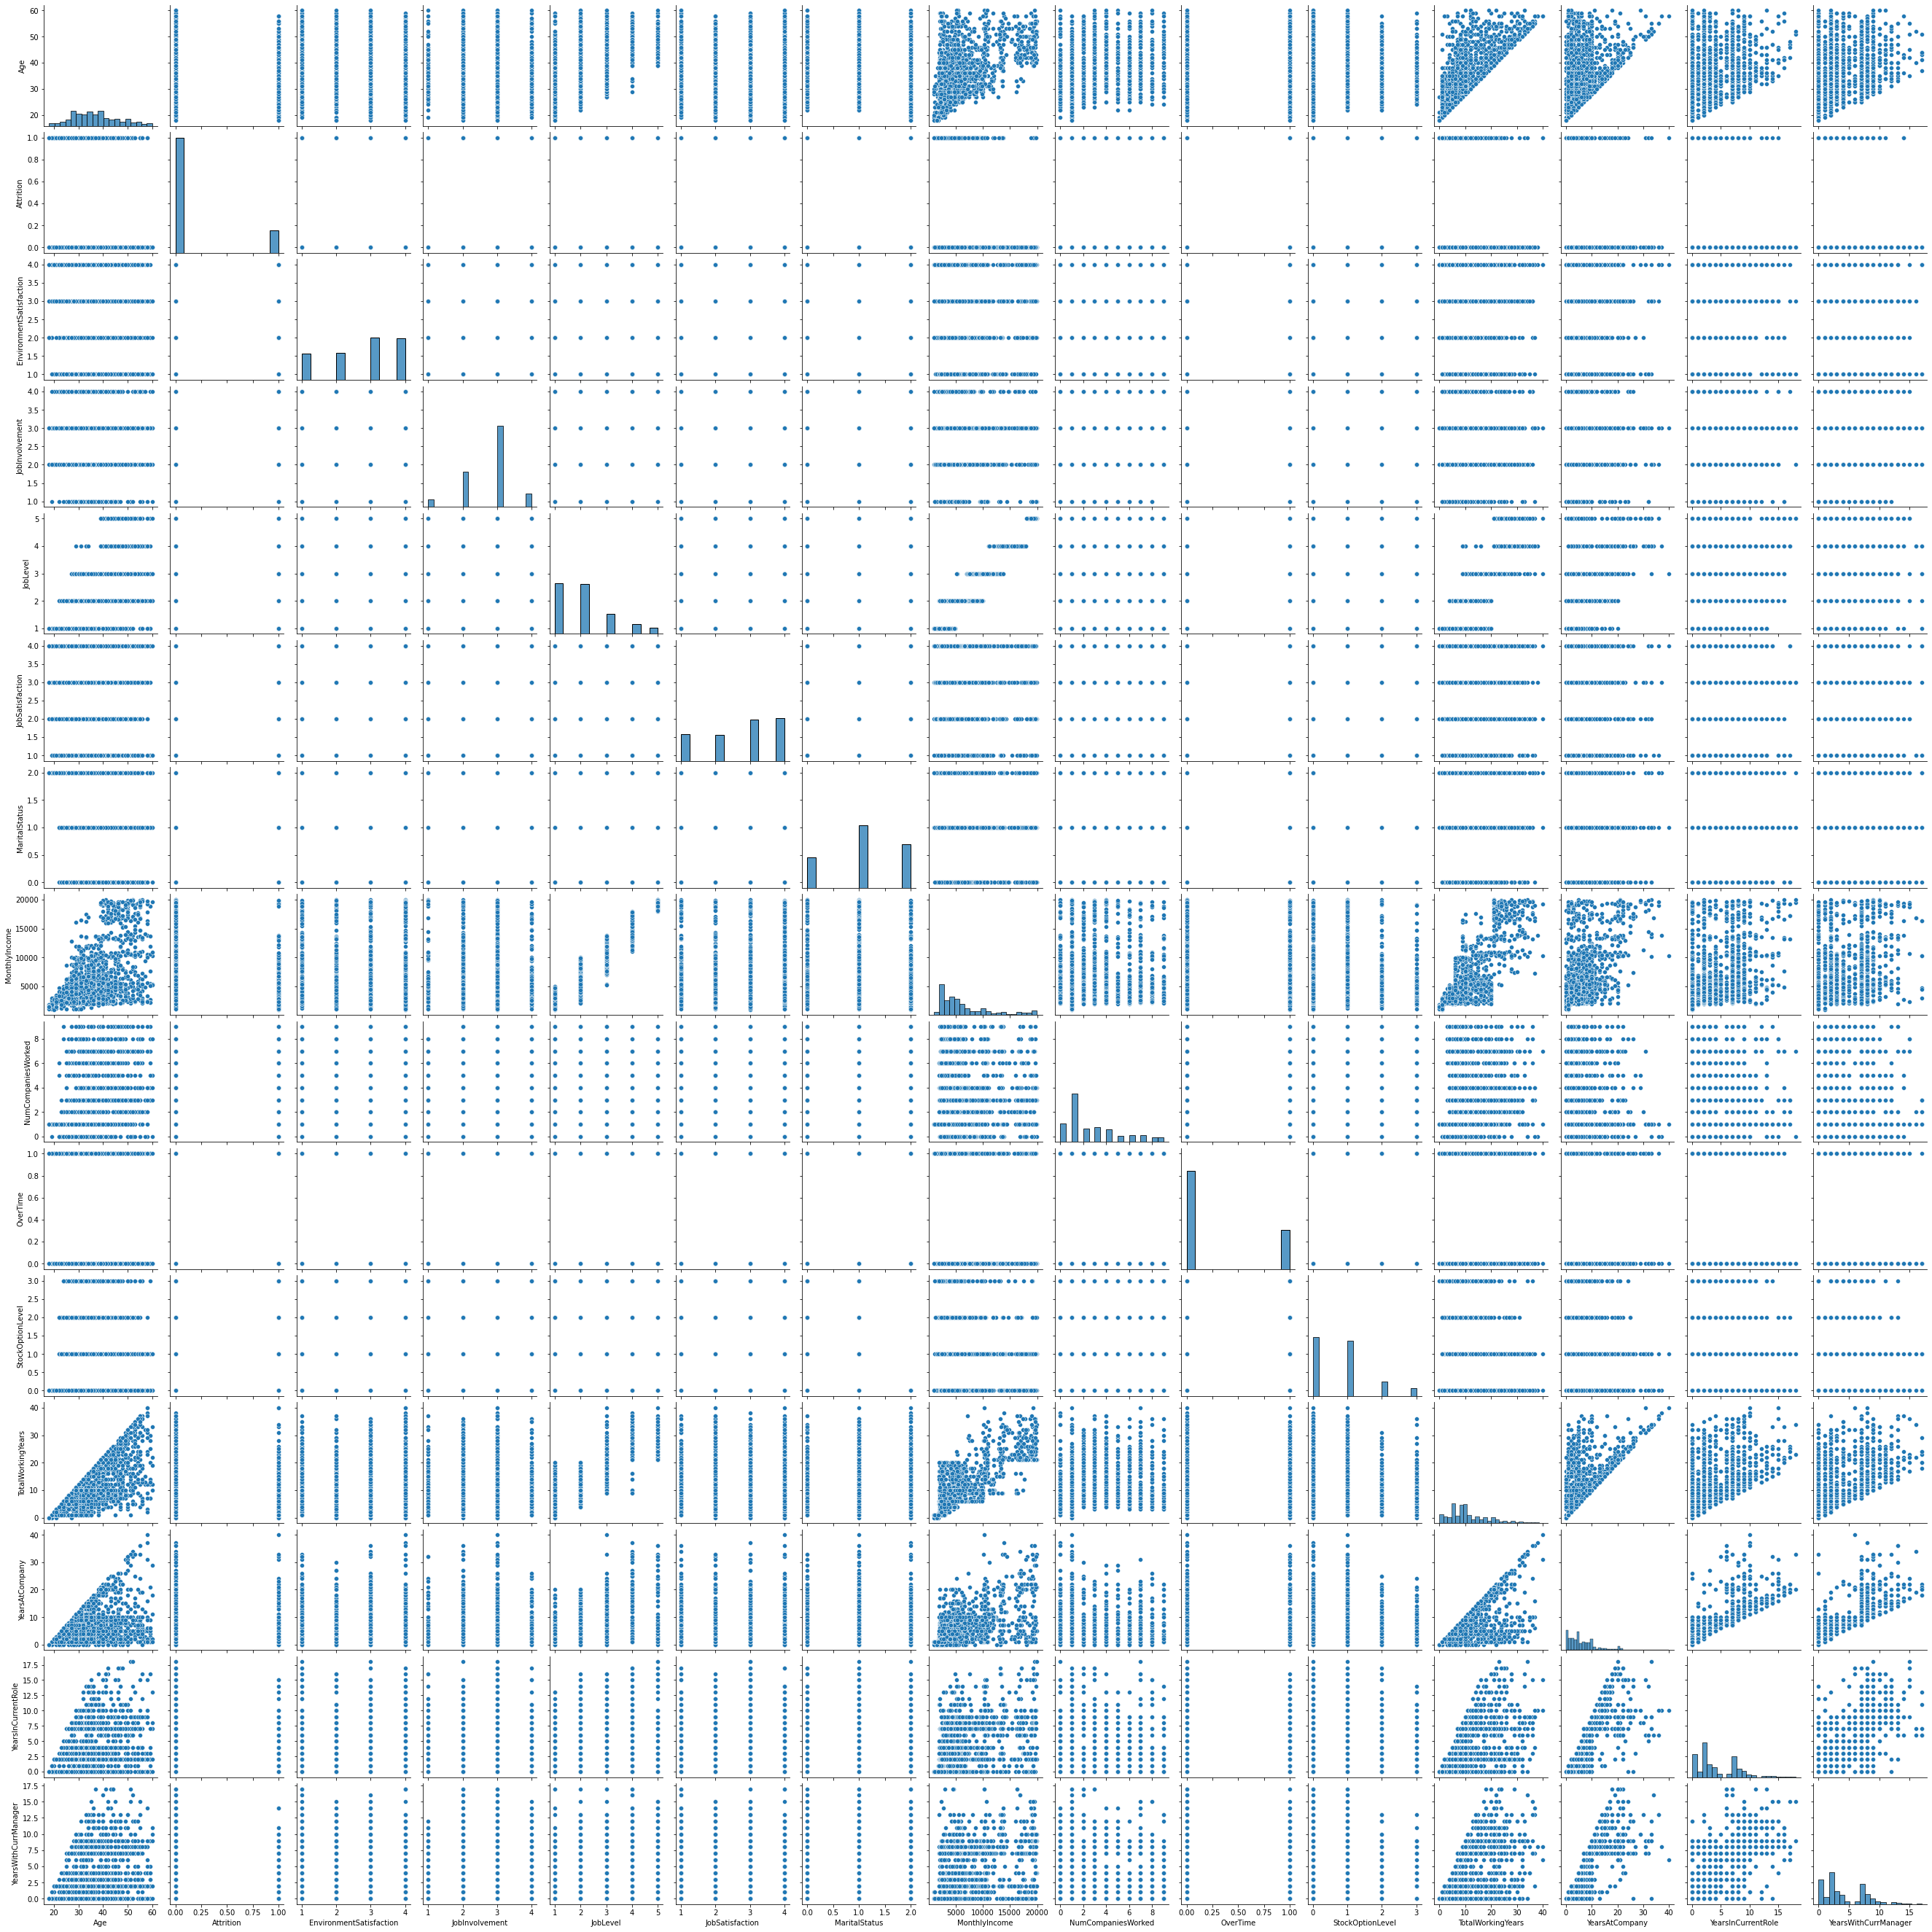

In [28]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

In [29]:
df1.columns

Index(['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

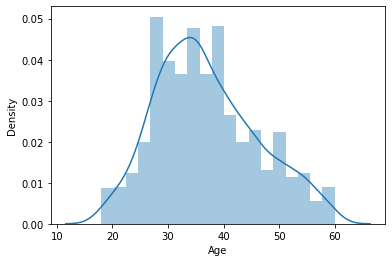

In [30]:
#we will check the data distribution using distplots
sns.distplot(df1['Age'])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

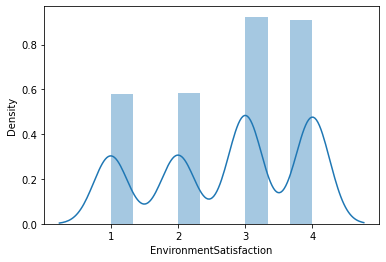

In [31]:
sns.distplot(df1['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

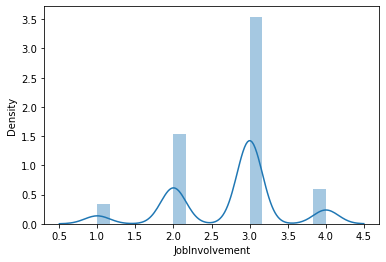

In [32]:
sns.distplot(df1['JobInvolvement'])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

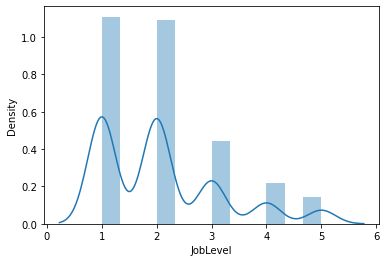

In [33]:
sns.distplot(df1['JobLevel'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

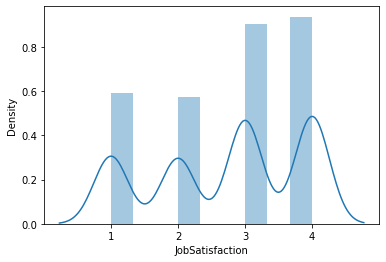

In [34]:
sns.distplot(df1['JobSatisfaction'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

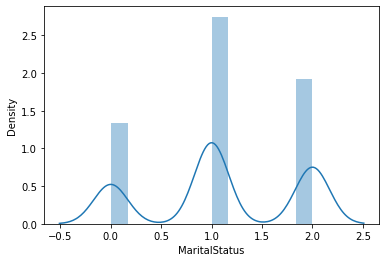

In [35]:
sns.distplot(df1['MaritalStatus'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

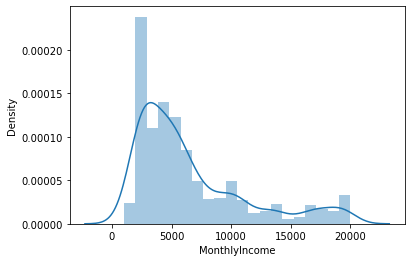

In [36]:
sns.distplot(df1['MonthlyIncome'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

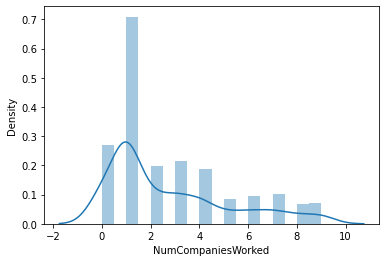

In [37]:
sns.distplot(df1['NumCompaniesWorked'])

<AxesSubplot:xlabel='OverTime', ylabel='Density'>

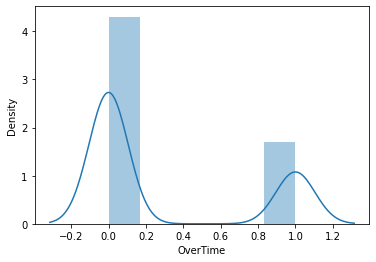

In [38]:
sns.distplot(df1['OverTime'])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

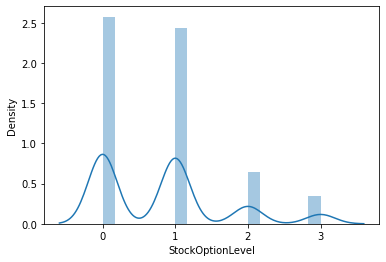

In [39]:
sns.distplot(df1['StockOptionLevel'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

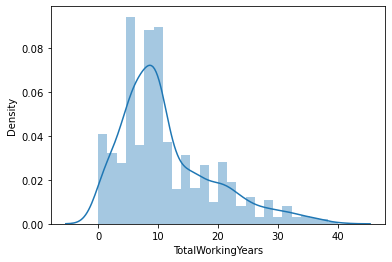

In [40]:
sns.distplot(df1['TotalWorkingYears'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

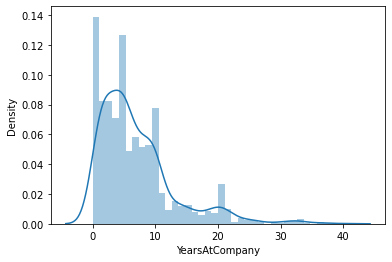

In [41]:
sns.distplot(df1['YearsAtCompany'])

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

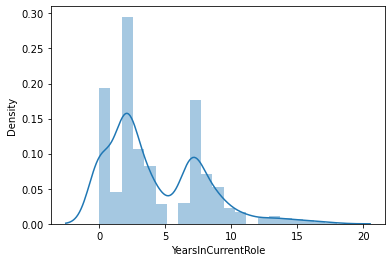

In [42]:
sns.distplot(df1['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

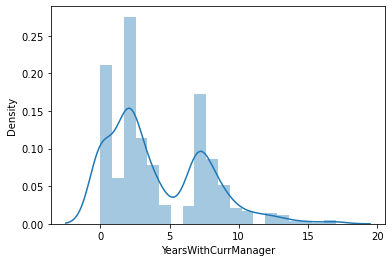

In [43]:
sns.distplot(df1['YearsWithCurrManager'])

Age                           AxesSubplot(0.125,0.657941;0.110714x0.222059)
Attrition                  AxesSubplot(0.257857,0.657941;0.110714x0.222059)
EnvironmentSatisfaction    AxesSubplot(0.390714,0.657941;0.110714x0.222059)
JobInvolvement             AxesSubplot(0.523571,0.657941;0.110714x0.222059)
JobLevel                   AxesSubplot(0.656429,0.657941;0.110714x0.222059)
JobSatisfaction            AxesSubplot(0.789286,0.657941;0.110714x0.222059)
MaritalStatus                 AxesSubplot(0.125,0.391471;0.110714x0.222059)
MonthlyIncome              AxesSubplot(0.257857,0.391471;0.110714x0.222059)
NumCompaniesWorked         AxesSubplot(0.390714,0.391471;0.110714x0.222059)
OverTime                   AxesSubplot(0.523571,0.391471;0.110714x0.222059)
StockOptionLevel           AxesSubplot(0.656429,0.391471;0.110714x0.222059)
TotalWorkingYears          AxesSubplot(0.789286,0.391471;0.110714x0.222059)
YearsAtCompany                   AxesSubplot(0.125,0.125;0.110714x0.222059)
YearsInCurre

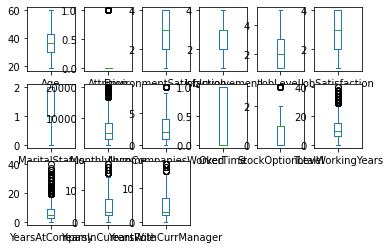

In [65]:

df1.plot(kind='box',subplots=True,layout=(3,6))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

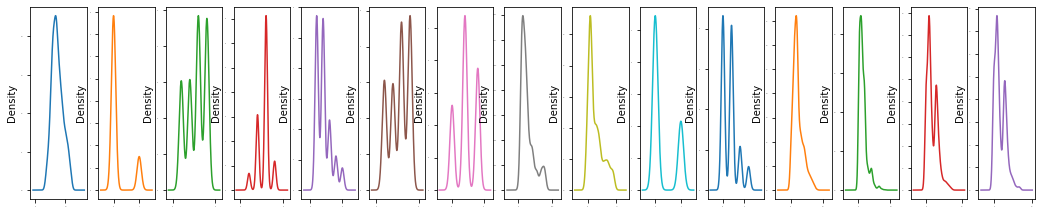

In [62]:
df1.plot(kind='density',subplots=True,layout=(3,15),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Above density charts and distributions charts clearly indicates skewness in data

As we have outliers in the data so we need to remove outliers first

In [72]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0.446350,2.280906,0.660531,0.379672,0.057788,1.153254,1.236820,0.108350,2.125136,1.591746,0.932014,0.421642,0.164613,0.063296,0.245834
1,1.322365,0.438422,0.254625,1.026167,0.057788,0.660853,0.133282,0.291719,0.678049,0.628241,0.241988,0.164511,0.488508,0.764998,0.806541
2,0.008343,2.280906,1.169781,1.026167,0.961486,0.246200,1.236820,0.937654,1.324226,1.591746,0.932014,0.550208,1.144294,1.167687,1.155935
3,0.429664,0.438422,1.169781,0.379672,0.961486,0.246200,0.133282,0.763634,0.678049,1.591746,0.932014,0.421642,0.161947,0.764998,1.155935
4,1.086676,0.438422,1.575686,0.379672,0.961486,0.660853,0.133282,0.644858,2.525591,0.628241,0.241988,0.678774,0.817734,0.615492,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.254625,1.785511,0.057788,1.153254,0.133282,0.835451,0.523316,0.628241,0.241988,0.735447,0.327893,0.615492,0.314873
1466,0.227347,0.438422,1.169781,1.026167,0.845911,1.567907,0.133282,0.741140,0.523316,0.628241,0.241988,0.293077,0.001333,0.764998,0.806541
1467,1.086676,0.438422,0.660531,1.785511,0.057788,0.660853,0.133282,0.076690,0.678049,1.591746,0.241988,0.678774,0.164613,0.615492,0.314873
1468,1.322365,0.438422,1.169781,1.026167,0.057788,0.660853,0.133282,0.236474,0.277594,0.628241,0.932014,0.735447,0.325228,0.488900,1.086895


In [73]:
z=np.abs(zscore(df1))

In [74]:
z.shape

(1470, 15)

In [75]:
threshold=3
print(np.where(z>3))

(array([  28,   62,   63,   85,   98,   98,  123,  123,  126,  126,  153,
        187,  187,  190,  190,  231,  231,  237,  270,  270,  281,  386,
        401,  411,  425,  445,  466,  473,  477,  561,  561,  592,  595,
        595,  616,  624,  635,  653,  677,  686,  716,  746,  749,  861,
        875,  894,  914,  918,  926,  956,  962,  976, 1024, 1043, 1078,
       1086, 1111, 1116, 1116, 1135, 1138, 1184, 1301, 1327, 1348, 1351,
       1401, 1430], dtype=int64), array([14, 12, 13, 11, 11, 12, 13, 14, 11, 12, 14, 11, 14, 12, 13, 13, 14,
       12, 11, 12, 13, 14, 11, 12, 12, 11, 13, 12, 12, 12, 14, 12, 11, 12,
       14, 11, 14, 12, 12, 14, 13, 13, 12, 12, 14, 11, 12, 12, 14, 11, 12,
       13, 13, 11, 14, 12, 12, 11, 12, 12, 12, 11, 11, 13, 14, 13, 11, 13],
      dtype=int64))


In [76]:
len(np.where(z>3)[0])

68

In [77]:
df2=df1[(z<3).all(axis=1)]

In [78]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (1470, 15)
new dataframe (1412, 15)
total dropped 58


In [79]:
loss_percent=(1470-1412)/1470*100
print(loss_percent,"%")
#here by removing the outliers loosign 3.9% of data which is fine as it will help in gettign better model accuracy

3.9455782312925165 %


In [80]:
#we will now check skewness in data
df2.skew()

Age                        0.449721
Attrition                  1.806833
EnvironmentSatisfaction   -0.327542
JobInvolvement            -0.492319
JobLevel                   1.098427
JobSatisfaction           -0.341911
MaritalStatus             -0.156517
MonthlyIncome              1.494853
NumCompaniesWorked         1.032770
OverTime                   0.962926
StockOptionLevel           0.962487
TotalWorkingYears          0.980264
YearsAtCompany             1.292889
YearsInCurrentRole         0.767746
YearsWithCurrManager       0.688839
dtype: float64

In [81]:
# We will break data into input and output and then remove skewness
x=df2.drop("Attrition",axis=1)
y=df2["Attrition"]

In [82]:
x

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,2,3,2,4,2.0,5993,8,1.0,0,8,6,4,5
1,49,3,2,2,2,1.0,5130,1,0.0,1,10,10,7,7
2,37,4,2,1,3,2.0,2090,6,1.0,0,7,0,0,0
3,33,4,3,1,3,1.0,2909,1,1.0,0,8,8,7,0
4,27,1,3,1,2,1.0,3468,9,0.0,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,4,2,4,1.0,2571,4,0.0,1,17,5,2,3
1466,39,4,2,3,1,1.0,9991,4,0.0,1,9,7,7,7
1467,27,2,4,2,2,1.0,6142,1,1.0,1,6,6,2,3
1468,49,4,2,2,2,1.0,5390,2,0.0,0,17,9,6,8


In [83]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1412, dtype: float64

In [84]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,Age,23.969503
1,EnvironmentSatisfaction,6.650781
2,JobInvolvement,12.183279
3,JobLevel,45.021158
4,JobSatisfaction,6.602280
5,MaritalStatus,4.931991
6,MonthlyIncome,28.387961
7,NumCompaniesWorked,2.660816
8,OverTime,1.404109
9,StockOptionLevel,3.016590


TotalWorkingYears,YearsWithCurrManager  & TotalWorkingYears,YearsAtCompany have very close VIF and showing muticolliniearilty hence we will drop 2 out of these 4 columns

In [86]:
x1=x.drop(["YearsAtCompany","YearsInCurrentRole"],axis=1)
x1

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager
0,41,2,3,2,4,2.0,5993,8,1.0,0,8,5
1,49,3,2,2,2,1.0,5130,1,0.0,1,10,7
2,37,4,2,1,3,2.0,2090,6,1.0,0,7,0
3,33,4,3,1,3,1.0,2909,1,1.0,0,8,0
4,27,1,3,1,2,1.0,3468,9,0.0,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,4,2,4,1.0,2571,4,0.0,1,17,3
1466,39,4,2,3,1,1.0,9991,4,0.0,1,9,7
1467,27,2,4,2,2,1.0,6142,1,1.0,1,6,3
1468,49,4,2,2,2,1.0,5390,2,0.0,0,17,8


In [87]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [88]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0    -0.005150
1    -0.204823
2    -0.019244
3     0.107929
4    -0.216837
5    -0.158234
6     0.000000
7     0.015922
8     0.962926
9     0.090822
10   -0.015022
11   -0.072841
dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

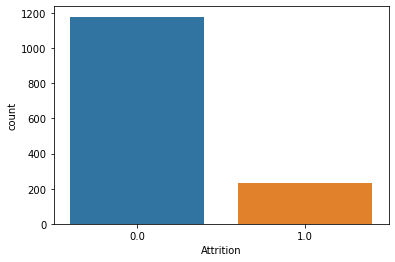

In [89]:
sns.countplot(y)

As this is classification problem and we can see imbalance data so will use Smote technique to balance the data

In [90]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [91]:
smt=SMOTE()
x3,y1=smt.fit_resample(x2,y)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

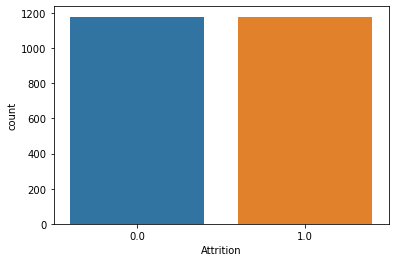

In [92]:
sns.countplot(y1)

In [93]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x3=st.fit_transform(x3)
x3

array([[ 0.74874108, -0.60459751,  0.43740505, ..., -0.91098515,
         0.01609054,  0.71509992],
       [ 1.49600756,  0.31440829, -0.98417032, ...,  0.72135517,
         0.32227459,  1.1462154 ],
       [ 0.3310405 ,  1.32328045, -0.98417032, ..., -0.91098515,
        -0.1537123 , -1.35837449],
       ...,
       [-1.40247416, -1.41540756,  0.22734437, ..., -0.91098515,
        -0.43876896,  0.36044843],
       [ 0.51302635, -1.41540756,  0.43740505, ..., -0.91098515,
        -1.12737395, -0.49034029],
       [ 1.07224756, -0.60459751,  2.16704846, ..., -0.91098515,
         0.6180852 , -0.39814074]])

Now we have our input and output ready to be tested for model , this is a classification problem so will go with Multinomial Naive Bayes first

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x3_train,x3_test,y1_train,y1_test=train_test_split(x3,y1,test_size=.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x3_train,y1_train)
    predlr=lr.predict(x3_test)
    acc=accuracy_score(y1_test,predlr)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)
    

accuracy 0.7372881355932204 random_state 1
accuracy 0.7457627118644068 random_state 2
accuracy 0.7838983050847458 random_state 3
accuracy 0.7478813559322034 random_state 4
accuracy 0.7521186440677966 random_state 5
accuracy 0.7669491525423728 random_state 6
accuracy 0.7436440677966102 random_state 7
accuracy 0.7478813559322034 random_state 8
accuracy 0.7711864406779662 random_state 9
accuracy 0.7457627118644068 random_state 10
accuracy 0.7584745762711864 random_state 11
accuracy 0.7733050847457628 random_state 12
accuracy 0.7648305084745762 random_state 13
accuracy 0.7711864406779662 random_state 14
accuracy 0.7351694915254238 random_state 15
accuracy 0.7584745762711864 random_state 16
accuracy 0.7817796610169492 random_state 17
accuracy 0.7648305084745762 random_state 18
accuracy 0.75 random_state 19
accuracy 0.7563559322033898 random_state 20
accuracy 0.777542372881356 random_state 21
accuracy 0.7690677966101694 random_state 22
accuracy 0.7372881355932204 random_state 23
accuracy 0.7

accuracy 0.7478813559322034 random_state 199
Best Accuracy is 0.809322033898305 on Random State 92


In [97]:
#Applying the above parameters to Logistic Regression 
lr=LogisticRegression()
x3_train,x3_test,y1_train,y1_test=train_test_split(x3,y1,test_size=.20,random_state=92)
lr.fit(x3_train,y1_train)
predlr=lr.predict(x3_test)
print(accuracy_score(y1_test,predlr))
print(confusion_matrix(y1_test,predlr))
print(classification_report(y1_test,predlr))
cvscore=cross_val_score(lr,x3,y1,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.809322033898305
[[188  47]
 [ 43 194]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       235
         1.0       0.80      0.82      0.81       237

    accuracy                           0.81       472
   macro avg       0.81      0.81      0.81       472
weighted avg       0.81      0.81      0.81       472

cross val score: 0.7625175429126634


In [100]:
#Lets try with RandomForest Classifier model
rfs=RandomForestClassifier(n_estimators=100,random_state=92)
rfs.fit(x3_train,y1_train)
predrfs=rfs.predict(x3_test)
print(accuracy_score(y1_test,predrfs))
print(confusion_matrix(y1_test,predrfs))
print(classification_report(y1_test,predrfs))
cvscore1=cross_val_score(rfs,x3,y1,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.9364406779661016
[[228  18]
 [ 12 214]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       246
         1.0       0.92      0.95      0.93       226

    accuracy                           0.94       472
   macro avg       0.94      0.94      0.94       472
weighted avg       0.94      0.94      0.94       472

cross val score: 0.9219925150239303


In [101]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x3_train,y1_train)
knn.score(x3_train,y1_train)
predknn=knn.predict(x3_test)
print(accuracy_score(y1_test,predknn))
print(confusion_matrix(y1_test,predknn))
print(classification_report(y1_test,predknn))
cvscore2=cross_val_score(knn,x3,y1,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.8495762711864406
[[177  69]
 [  2 224]]
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.83       246
         1.0       0.76      0.99      0.86       226

    accuracy                           0.85       472
   macro avg       0.88      0.86      0.85       472
weighted avg       0.88      0.85      0.85       472

cross val score: 0.8566636079024075


In [102]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x3_train,y1_train)
svc.score(x3_train,y1_train)
predsvc=svc.predict(x3_test)
print(accuracy_score(y1_test,predsvc))
print(confusion_matrix(y1_test,predsvc))
print(classification_report(y1_test,predsvc))
cvscore3=cross_val_score(svc,x3,y1,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.8135593220338984
[[196  50]
 [ 38 188]]
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       246
         1.0       0.79      0.83      0.81       226

    accuracy                           0.81       472
   macro avg       0.81      0.81      0.81       472
weighted avg       0.81      0.81      0.81       472

cross val score: 0.8278248587570621


In [103]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x3_train,y1_train)
dtc.score(x3_train,y1_train)
preddtc=dtc.predict(x3_test)
print(accuracy_score(y1_test,preddtc))
print(confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))
cvscore4=cross_val_score(dtc,x3,y1,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.8305084745762712
[[197  49]
 [ 31 195]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       246
         1.0       0.80      0.86      0.83       226

    accuracy                           0.83       472
   macro avg       0.83      0.83      0.83       472
weighted avg       0.83      0.83      0.83       472

cross val score: 0.8435433085033646


In [104]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x3_train,y1_train)
ad_pred=ad.predict(x3_test)
print(accuracy_score(y1_test,ad_pred))
print(confusion_matrix(y1_test,ad_pred))
print(classification_report(y1_test,ad_pred))
cvscore5=cross_val_score(ad,x3,y1,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.8665254237288136
[[210  36]
 [ 27 199]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       246
         1.0       0.85      0.88      0.86       226

    accuracy                           0.87       472
   macro avg       0.87      0.87      0.87       472
weighted avg       0.87      0.87      0.87       472

cross val score: 0.854151822663644


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x3_train,y1_train)
gb_pred=gb.predict(x3_test)
print(accuracy_score(y1_test,gb_pred))
print(confusion_matrix(y1_test,gb_pred))
print(classification_report(y1_test,gb_pred))
cvscore6=cross_val_score(gb,x3,y1,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.923728813559322
[[229  17]
 [ 19 207]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       246
         1.0       0.92      0.92      0.92       226

    accuracy                           0.92       472
   macro avg       0.92      0.92      0.92       472
weighted avg       0.92      0.92      0.92       472

cross val score: 0.877486595415452


Hypertuning below for the algorithm selected as Random Forest Classifier

In [106]:
RandomForestClassifier()

RandomForestClassifier()

In [107]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [108]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x3_train,y1_train)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [109]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [110]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2')

In [111]:
GCV_pred=GCV.best_estimator_.predict(x3_test)
accuracy_score(y1_test,GCV_pred)
print(accuracy_score(y1_test,GCV_pred))
print(confusion_matrix(y1_test,GCV_pred))
print(classification_report(y1_test,GCV_pred))
cvscore7=cross_val_score(GCV.best_estimator_,x3,y1,cv=5)
cvm7=cvscore7.mean()
print("cross val score:",cvm7)

0.940677966101695
[[231  15]
 [ 13 213]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       246
         1.0       0.93      0.94      0.94       226

    accuracy                           0.94       472
   macro avg       0.94      0.94      0.94       472
weighted avg       0.94      0.94      0.94       472

cross val score: 0.9270871567886573


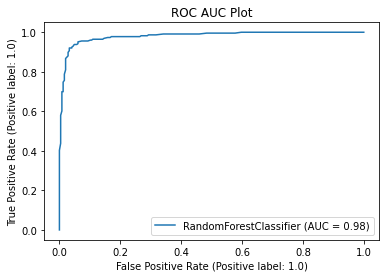

In [113]:
#Lets plot AUC ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x3_test,y1_test)
plt.title("ROC AUC Plot")
plt.show()

-------------------------------------------------------------------------------------------------
Logistic Regression 80% accuracy score ,81 % accuracy in F1 score and 76 % Cross Val score 

RandomForestClassifier 93% accuracy score ,94 % accuracy in F1 score and 92 % Cross Val score 

KNeighborsClassifier 84 % accuracy , 85 % accuracy in F1 score and 85 % Cross Val score 

support vector classifier using kernel as poly 81 % accuracy , 81 % accuracy in F1 score and 82 % Cross Val score 

DecisionTreeClassifier 83% accuracy , 83 % accuracy in F1 score and 84 % Cross Val score 

AdaBoostClassifier 86 % accuracy , 87 % accuracy in F1 score and 85 % Cross Val score 

GradientBoostingClassifier 92 % accuracy , 92 % accuracy in F1 score and 87 % Cross Val score 

By doing Hypertuning using RandomForestClassifier with best param 94 % accuracy , 94 % accuracy in F1 score and 93 % Cross Val score

We select Hypertuned Random Forest Classifier which has 94% accuracy with 94% F1 Score and 93% cross val score as final model

The AUC ROC plot above provides 98%c score which is a very good score so will use the model

---------------------------------------------------------------------------------------------------

In [114]:
#we will save this model
import pickle

In [115]:
filename='HRAttrition.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [116]:
#Conclusion 
loaded_model=pickle.load(open('HRAttrition.pkl','rb'))
result=loaded_model.score(x3_test,y1_test)
print(result)
                        

0.940677966101695


In [117]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x3_test)[:],GCV_pred[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,462,463,464,465,466,467,468,469,470,471
Predicted,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Original,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Above we are testing the agreed model and results 